In [1]:
#for library to help a LFPS Interpretation
!pip install scikit-learn
!pip install xlrd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime as dt
import tkinter as tk
import warnings
from tkinter import filedialog
from datetime import datetime, date,timedelta
warnings.filterwarnings('ignore')
import gdown

#for machine learning modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set plot style for consistency
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [3]:
root = tk.Tk()
root.withdraw()  # Hide the root window

file_path = filedialog.askopenfilename()
print("Selected file:", file_path)

# Then open/read this file normally
with open(file_path, 'rb') as f:
    data = f.read()

Selected file: E:/Atribut LFPS.xls


In [4]:
data = pd.DataFrame(pd.read_excel('E:/Atribut LFPS.xls'))
data

,ID,X (meter),Y (meter),Frequency V/H,Amplitude (V/H),PSD-IZ (Hz),Dip (0),Reclinity
0,N01_1,441512,9851856,3.03,2.36,3.13,39,0.19
1,N01_2,441512,9851856,3.03,2.39,3.07,35,0.17
2,N05_1,440138,9850393,2.65,2.48,2.67,30,0.24
3,N05_2,440138,9850393,2.68,2.96,2.65,41,0.21
4,N08_1,441230,9850767,0.92,2.78,0.73,52,0.17
5,N08_2,441230,9850767,0.87,2.73,0.87,60,0.17
6,N10_1,441879,9851502,1.03,3.13,1.03,37,0.19
7,N10_2,441879,9851502,1.05,3.13,0.83,39,0.21
8,N13_1,440490,9851429,1.75,2.86,0.63,54,0.27
9,N13_2,440490,9851429,0.67,3.17,0.55,70,0.32


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               18 non-null     object 
 1   X (meter)        18 non-null     int64  
 2   Y (meter)        18 non-null     int64  
 3   Frequency V/H    18 non-null     float64
 4   Amplitude (V/H)  18 non-null     float64
 5   PSD-IZ (Hz)      18 non-null     float64
 6   Dip (0)          18 non-null     int64  
 7   Reclinity        18 non-null     float64
dtypes: float64(4), int64(3), object(1)
memory usage: 1.2+ KB


In [7]:
# # menghapus data NaN
# data_copy = data.copy()
# data_copy = data_copy.dropna(subset=['X (meter)','Frequency V/H  (1)','Amplitude (V/H)(1)','Frequency V/H  (2)','Amplitude (V/H)(2)'])
# data_copy

In [8]:
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs                                        # Generate isotropic Gaussian blobs for clustering

In [9]:
data_clustering = data_copy.copy()
data_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               18 non-null     object 
 1   X (meter)        18 non-null     int64  
 2   Y (meter)        18 non-null     int64  
 3   Frequency V/H    18 non-null     float64
 4   Amplitude (V/H)  18 non-null     float64
 5   PSD-IZ (Hz)      18 non-null     float64
 6   Dip (0)          18 non-null     int64  
 7   Reclinity        18 non-null     float64
dtypes: float64(4), int64(3), object(1)
memory usage: 1.2+ KB


In [10]:
data_clustering = data_clustering.drop(['X (meter)','Y (meter)'], axis=1)
data_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               18 non-null     object 
 1   Frequency V/H    18 non-null     float64
 2   Amplitude (V/H)  18 non-null     float64
 3   PSD-IZ (Hz)      18 non-null     float64
 4   Dip (0)          18 non-null     int64  
 5   Reclinity        18 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 992.0+ bytes


In [11]:
data_clustering = data_clustering.select_dtypes(include='number').copy()
data_clustering.head()

,Frequency V/H,Amplitude (V/H),PSD-IZ (Hz),Dip (0),Reclinity
0,3.03,2.36,3.13,39,0.19
1,3.03,2.39,3.07,35,0.17
2,2.65,2.48,2.67,30,0.24
3,2.68,2.96,2.65,41,0.21
4,0.92,2.78,0.73,52,0.17


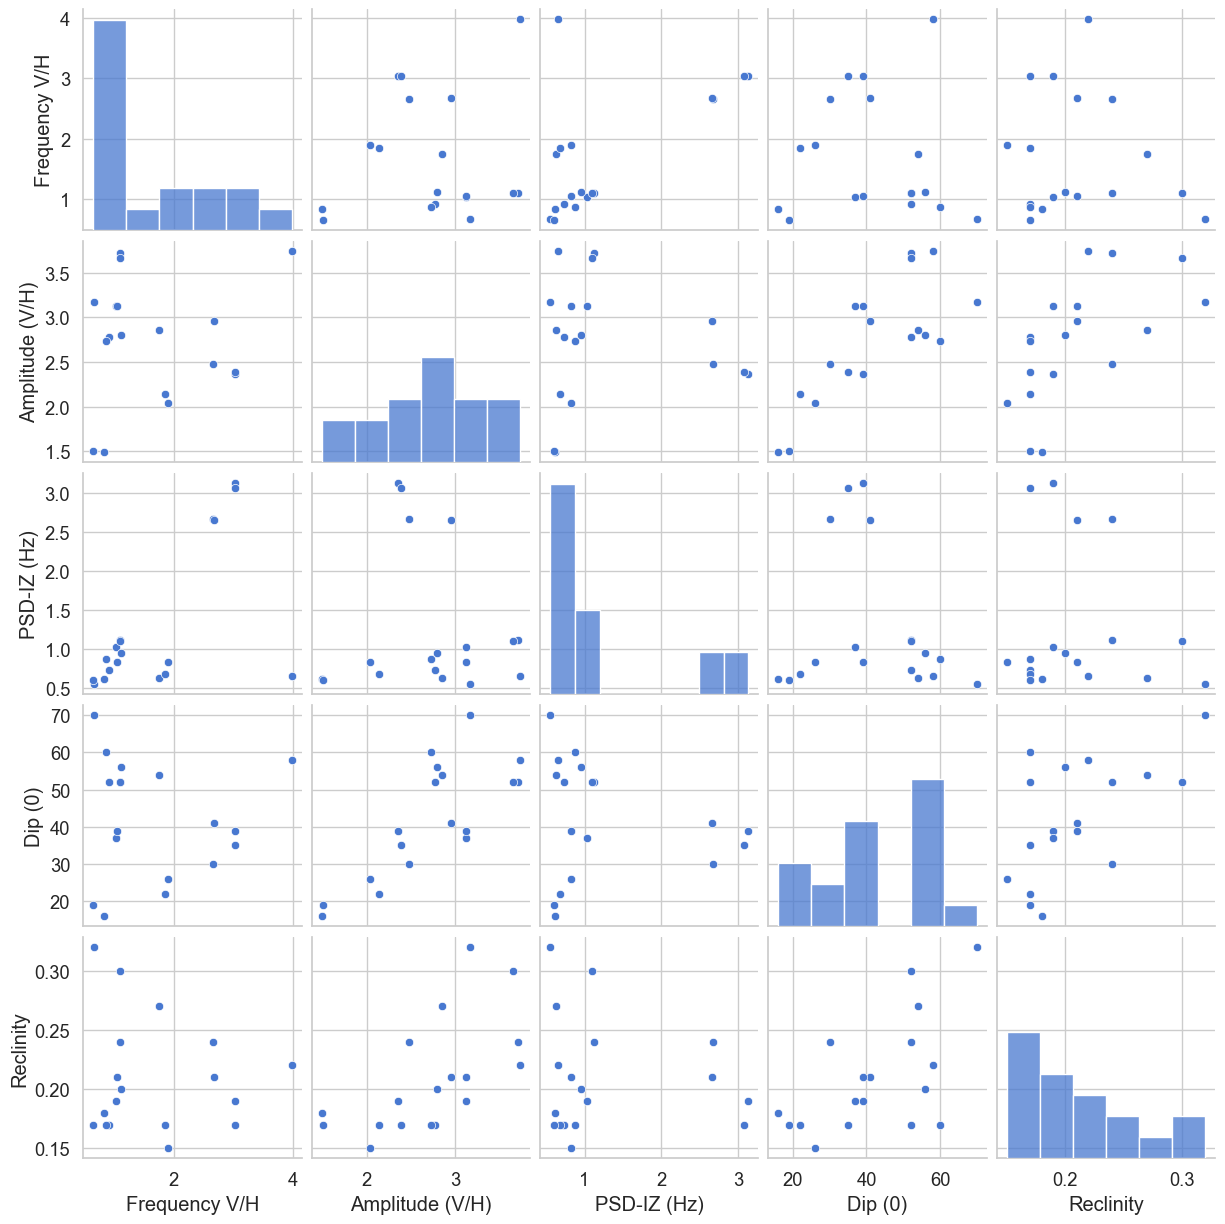

In [12]:
sns.pairplot(data_clustering)

In [13]:
data_clustering.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency V/H,18.0,1.678333,0.994131,0.65,0.9475,1.110,2.4625,3.98
Amplitude (V/H),18.0,2.726667,0.670619,1.49,2.3675,2.790,3.1300,3.74
PSD-IZ (Hz),18.0,1.261667,0.912168,0.55,0.6575,0.850,1.1150,3.13
Dip (0),18.0,42.111111,15.533224,16.00,31.2500,40.000,53.5000,70.00
Reclinity,18.0,0.209444,0.047955,0.15,0.1700,0.195,0.2350,0.32


In [16]:
#MinMax Scaler
mm_scale_df = data_clustering.copy()
column = data_clustering.columns.to_list()
# using Minmax Scaler
mm_scaler = MinMaxScaler()
mm_scale_df[['Frequency V/H','Amplitude (V/H)','PSD-IZ (Hz)','Dip (0)','Reclinity']] = mm_scaler.fit_transform(mm_scale_df[['Frequency V/H','Amplitude (V/H)','PSD-IZ (Hz)','Dip (0)','Reclinity']])

Text(0.5, 1.0, 'Result of Minmax Scale')

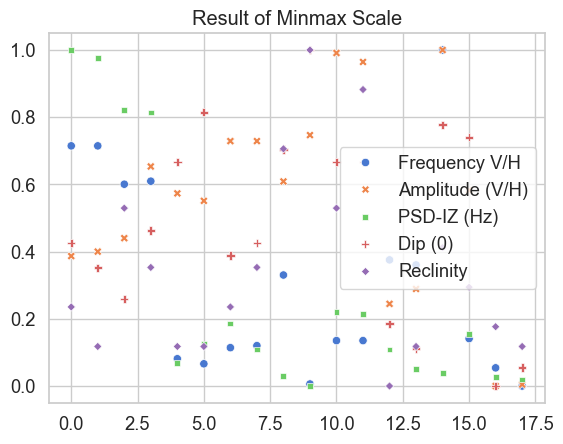

In [17]:
sns.scatterplot (data = mm_scale_df[['Frequency V/H','Amplitude (V/H)','PSD-IZ (Hz)','Dip (0)','Reclinity']])
plt.title('Result of Minmax Scale')

In [18]:
#Clustering
# LIBRARY
!pip install yellowbrick
import seaborn as sns # we imported on Day 5 but haven't used it yet
from sklearn.cluster import KMeans # doing KMeans clustering
from yellowbrick.cluster import SilhouetteVisualizer # to measure our cluster performance

In [19]:
# Initialize KMeans for 2 clusters and random_state = 1000 (See Appendix about Random State)
# Random state ini adalah untuk mem-fix-kan pilihan centroidnya
cluster_model = KMeans(n_clusters=3, random_state=1000, n_init='auto')
cluster_model

KMeans(n_clusters=3, n_init='auto', random_state=1000)

In [20]:
cluster_model.fit(mm_scale_df)

KMeans(n_clusters=3, n_init='auto', random_state=1000)

In [21]:
cluster_model.labels_

array([1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2])

In [22]:
mm_scale_df_copy = mm_scale_df.copy()
mm_scale_df_copy['cluster'] = cluster_model.labels_
mm_scale_df_copy

,Frequency V/H,Amplitude (V/H),PSD-IZ (Hz),Dip (0),Reclinity,cluster
0,0.714715,0.386667,1.000000,0.425926,0.235294,1
1,0.714715,0.400000,0.976744,0.351852,0.117647,1
2,0.600601,0.440000,0.821705,0.259259,0.529412,1
3,0.609610,0.653333,0.813953,0.462963,0.352941,1
4,0.081081,0.573333,0.069767,0.666667,0.117647,2
5,0.066066,0.551111,0.124031,0.814815,0.117647,2
6,0.114114,0.728889,0.186047,0.388889,0.235294,2
7,0.120120,0.728889,0.108527,0.425926,0.352941,2
8,0.330330,0.608889,0.031008,0.703704,0.705882,0
9,0.006006,0.746667,0.000000,1.000000,1.000000,0


In [23]:
mm_scale_df_copy['cluster'].value_counts()

cluster
2    9
0    5
1    4
Name: count, dtype: int64

In [24]:
#Elbow Method
# K-Means Clustering
# For each n_clusters between 1 and 11, we calculate the distortion value. So we use "for" iteration

# Create list kosong yang akan kita pakai untuk menampung distortion value tiap iterasi
distortions = []

K = range(1,10)
for n_clusters in K:
  # Buat modelnya
  kmeanModel = KMeans(n_clusters, random_state=1000, n_init='auto')
  # Train di model kita
  # Fit the KMeans model to the imputed data instead of the copy with NaNs
  kmeanModel.fit(mm_scale_df_copy)
  # Ambil distortion value pakai ".inertia_" lalu diappend ke list kosong tadi
  distortions.append(kmeanModel.inertia_)

# Print output
distortions

[21.02083108275673,
 7.928884902685692,
 2.9947119861028098,
 1.7782040889159179,
 1.0655065180248853,
 0.883160151345743,
 0.6716237009060233,
 0.474386684492995,
 0.33427653571008487]

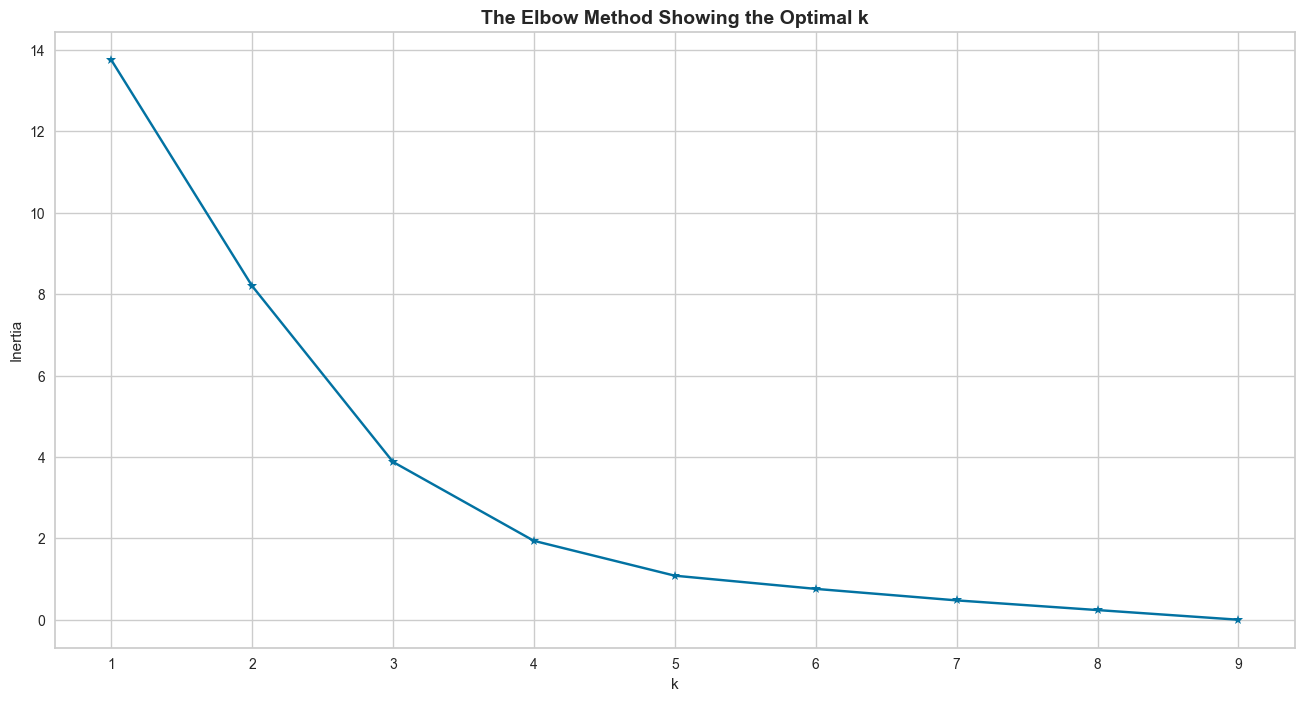

In [91]:
plt.figure(figsize=(16,8))

# Buat lineplot, x-axisnya adalah K (range(1,10) tadi), valuenya pakai list "distortions"
# Parameter ketiga adalah basic formatting: color, marker dan linestyle
# "b*-" artinya warna blue, tiap point disimbolkan *, dan dihubungkan -
# Ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html (bagian marker)
plt.plot(K, distortions, 'b*-')

plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method Showing the Optimal k', fontsize = 14, fontweight = 'bold')
plt.show()

Silhouette Score: 0.6219174267781026


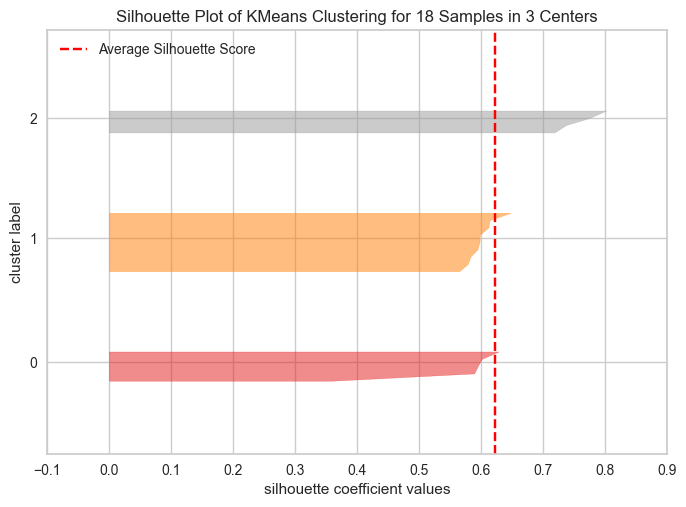

In [27]:
cluster_model = KMeans(n_clusters=3, random_state=1000, n_init='auto')
cluster_model.fit(mm_scale_df_copy)
# Define function SilhouetteVisualizernya, "is_fitted=True" kalau modelnya sudah difitkan sebelumnya
# Kalau mmodelnya belum ditrain bisa didefine "is_fitted=False" (nanti dia sekaligus bisa train)
sil = SilhouetteVisualizer(cluster_model, is_fitted=True)
# Fit di sini untuk show visualisasinya
sil.fit(mm_scale_df_copy)
# Berikan label dan title di visualisasinya
sil.finalize()
print("Silhouette Score:", sil.silhouette_score_)

For k=2, the average silhouette score is 0.5368411933546897
For k=3, the average silhouette score is 0.6219174267781026
For k=4, the average silhouette score is 0.6091815991585106
For k=5, the average silhouette score is 0.5612714415776348
For k=6, the average silhouette score is 0.5424887188616833
For k=7, the average silhouette score is 0.5890500012063583
For k=8, the average silhouette score is 0.5167510025941583
For k=9, the average silhouette score is 0.5139698331868467


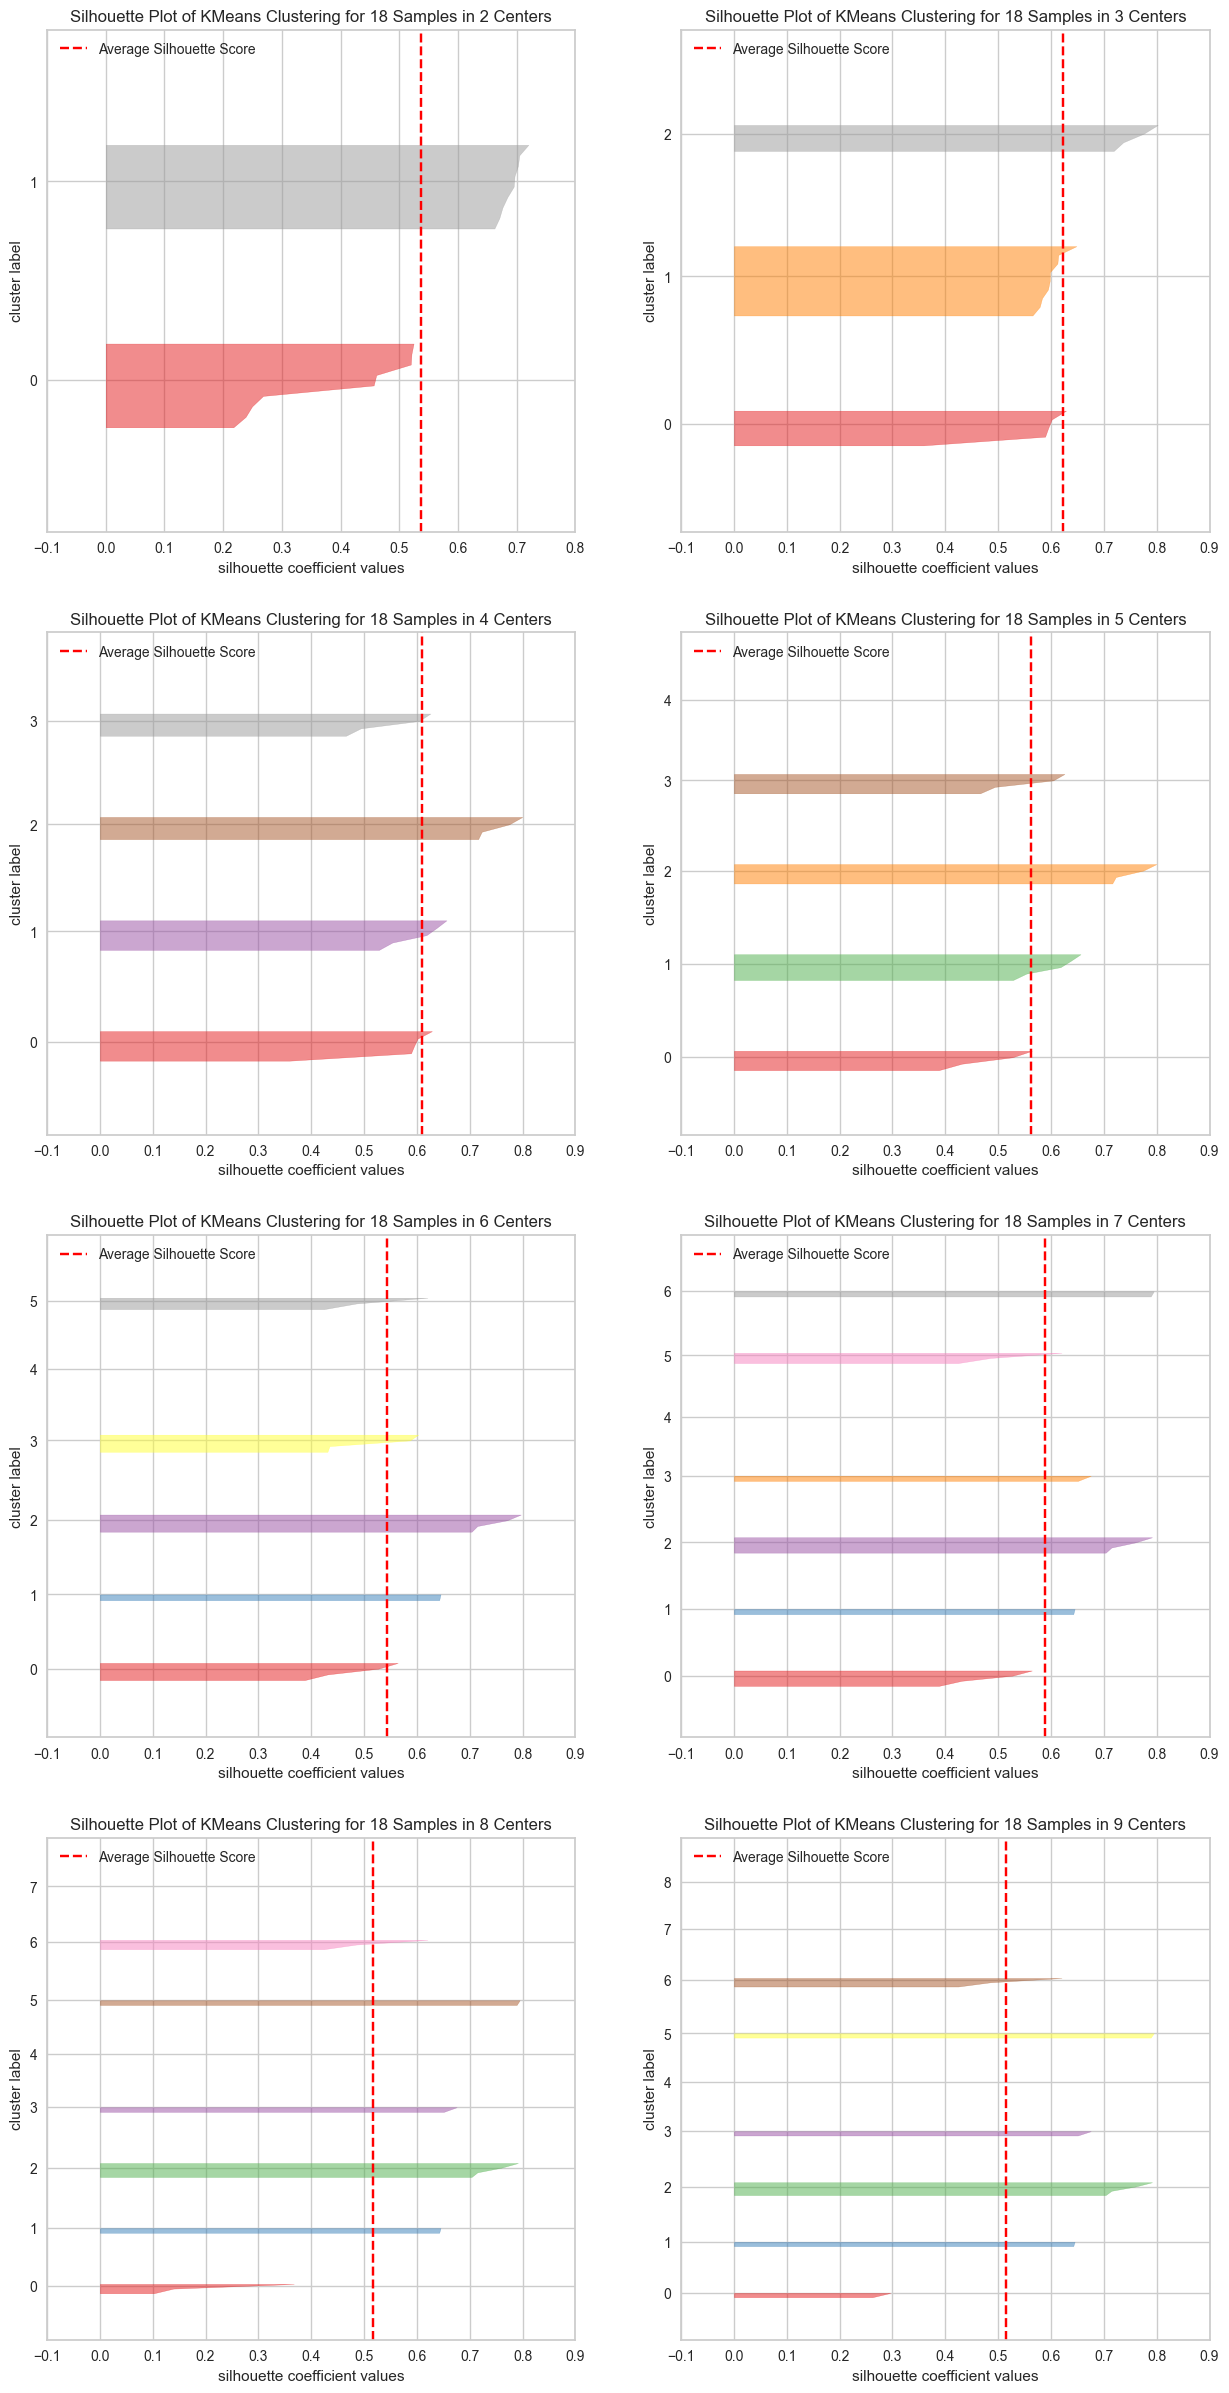

In [28]:
# Lakukan hal yang sama untuk setiap K, sekarang dari range 2-10
K = range(2,10)

# Kita akan show tiap visualisasi lewat subplot dengan 2 kolom dan N baris
# N menyesuaikan berapa banyak K yang kita pilih. Misal K-nya 11 biji, kita bikin subplots 6x2
# Kalau K 12, maka bikin subplots tetep 6x2. Jadi rumusnya banyak K dibagi 2, lalu dibulatkan ke atas

# Jadi harus tau berapa banyak elemen K
banyak_K = len(K)
# Baru dibagi 2 dan dibulatkan ke atas pakai np.ceil() -- (jangan lupa ubah ke int)
n_baris = int(np.ceil(banyak_K/2))

# Define canvasnya
fig, axes = plt.subplots(n_baris, 2, figsize=(15,30))

# Karena kita akan show masing-masing plot di axes bersesuaian, kita harus tau indexnya
# Kita bisa pakai function enumerate() untuk ambil index dan elemen dari sequence tiap iterasi (see Appendix)
for i, n_clusters in enumerate(K):
  kmeanModel = KMeans(n_clusters, random_state=1000, n_init='auto')

  # Untuk memasukkan tiap chart ke index bersesuaian, kita mending .flatten()-kan dulu axesnya
  # Sehingga indexnya akan berupa bilangan terurut (liat appendix)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted=False, ax=axes.flatten()[i])
  sil.fit(mm_scale_df_copy)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [31]:
# make cluster
Cluster_3 = mm_scale_df_copy

cluster_model = KMeans(n_clusters=3)
cluster_model.fit_predict(Cluster_3[['Frequency V/H','Amplitude (V/H)','PSD-IZ (Hz)','Dip (0)','Reclinity']])
Cluster_3['cluster'] = cluster_model.labels_
Cluster_3

,Frequency V/H,Amplitude (V/H),PSD-IZ (Hz),Dip (0),Reclinity,cluster
0,0.714715,0.386667,1.000000,0.425926,0.235294,2
1,0.714715,0.400000,0.976744,0.351852,0.117647,2
2,0.600601,0.440000,0.821705,0.259259,0.529412,2
3,0.609610,0.653333,0.813953,0.462963,0.352941,2
4,0.081081,0.573333,0.069767,0.666667,0.117647,0
5,0.066066,0.551111,0.124031,0.814815,0.117647,0
6,0.114114,0.728889,0.186047,0.388889,0.235294,0
7,0.120120,0.728889,0.108527,0.425926,0.352941,0
8,0.330330,0.608889,0.031008,0.703704,0.705882,0
9,0.006006,0.746667,0.000000,1.000000,1.000000,0


In [35]:
#Visualisasi Cluster
df_segmented = Cluster_3.merge(data, how='inner', left_index=True, right_index=True)
df_segmented

,Frequency V/H_x,Amplitude (V/H)_x,PSD-IZ (Hz)_x,Dip (0)_x,Reclinity_x,cluster,ID,X (meter),Y (meter),Frequency V/H_y,Amplitude (V/H)_y,PSD-IZ (Hz)_y,Dip (0)_y,Reclinity_y
0,0.714715,0.386667,1.000000,0.425926,0.235294,2,N01_1,441512,9851856,3.03,2.36,3.13,39,0.19
1,0.714715,0.400000,0.976744,0.351852,0.117647,2,N01_2,441512,9851856,3.03,2.39,3.07,35,0.17
2,0.600601,0.440000,0.821705,0.259259,0.529412,2,N05_1,440138,9850393,2.65,2.48,2.67,30,0.24
3,0.609610,0.653333,0.813953,0.462963,0.352941,2,N05_2,440138,9850393,2.68,2.96,2.65,41,0.21
4,0.081081,0.573333,0.069767,0.666667,0.117647,0,N08_1,441230,9850767,0.92,2.78,0.73,52,0.17
5,0.066066,0.551111,0.124031,0.814815,0.117647,0,N08_2,441230,9850767,0.87,2.73,0.87,60,0.17
6,0.114114,0.728889,0.186047,0.388889,0.235294,0,N10_1,441879,9851502,1.03,3.13,1.03,37,0.19
7,0.120120,0.728889,0.108527,0.425926,0.352941,0,N10_2,441879,9851502,1.05,3.13,0.83,39,0.21
8,0.330330,0.608889,0.031008,0.703704,0.705882,0,N13_1,440490,9851429,1.75,2.86,0.63,54,0.27
9,0.006006,0.746667,0.000000,1.000000,1.000000,0,N13_2,440490,9851429,0.67,3.17,0.55,70,0.32


In [36]:
df_segmented.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frequency V/H_x    18 non-null     float64
 1   Amplitude (V/H)_x  18 non-null     float64
 2   PSD-IZ (Hz)_x      18 non-null     float64
 3   Dip (0)_x          18 non-null     float64
 4   Reclinity_x        18 non-null     float64
 5   cluster            18 non-null     int32  
 6   ID                 18 non-null     object 
 7   X (meter)          18 non-null     int64  
 8   Y (meter)          18 non-null     int64  
 9   Frequency V/H_y    18 non-null     float64
 10  Amplitude (V/H)_y  18 non-null     float64
 11  PSD-IZ (Hz)_y      18 non-null     float64
 12  Dip (0)_y          18 non-null     int64  
 13  Reclinity_y        18 non-null     float64
dtypes: float64(9), int32(1), int64(3), object(1)
memory usage: 2.0+ KB


In [37]:
df_segmented.groupby('cluster',as_index = False)[['Frequency V/H_x','Amplitude (V/H)_x','PSD-IZ (Hz)_x','Dip (0)_x','Reclinity_x']].agg(['count','mean','min','max','median']).T

cluster                           0         1         2
Frequency V/H_x   count   10.000000  4.000000  4.000000
                  mean     0.212913  0.197447  0.659910
                  min      0.006006  0.000000  0.600601
                  max      1.000000  0.375375  0.714715
                  median   0.127628  0.207207  0.662162
Amplitude (V/H)_x count   10.000000  4.000000  4.000000
                  mean     0.747556  0.134444  0.470000
                  min      0.551111  0.000000  0.386667
                  max      1.000000  0.288889  0.653333
                  median   0.728889  0.124444  0.420000
PSD-IZ (Hz)_x     count   10.000000  4.000000  4.000000
                  mean     0.114729  0.051357  0.903101
                  min      0.000000  0.019380  0.813953
                  max      0.220930  0.108527  1.000000
                  median   0.116279  0.038760  0.899225
Dip (0)_x         count   10.000000  4.000000  4.000000
                  mean     0.685185  0.087963  0.375000
                  min      0.388889  0.000000  0.259259
                  max      1.000000  0.185185  0.462963
                  median   0.685185  0.083333  0.388889
Reclinity_x       count   10.000000  4.000000  4.000000
                  mean     0.464706  0.102941  0.308824
                  min      0.117647  0.000000  0.117647
                  max      1.000000  0.176471  0.529412
                  median   0.382353  0.117647  0.294118

In [45]:
df_segmented.groupby(['cluster','Frequency V/H_y','Amplitude (V/H)_y'], as_index = False)['ID'].count().sort_values(by=['ID'],ascending=False)

,cluster,Frequency V/H_y,Amplitude (V/H)_y,ID
0,0,0.67,3.17,1
1,0,0.87,2.73,1
16,2,3.03,2.36,1
15,2,2.68,2.96,1
14,2,2.65,2.48,1
13,1,1.90,2.04,1
12,1,1.85,2.14,1
11,1,0.83,1.49,1
10,1,0.65,1.50,1
9,0,3.98,3.74,1


In [46]:
df_segmented.groupby(['cluster','Amplitude (V/H)_y'], as_index = False)['ID'].count().sort_values(by=['ID'],ascending=False)

,cluster,Amplitude (V/H)_y,ID
4,0,3.13,2
0,0,2.73,1
9,1,1.49,1
15,2,2.48,1
14,2,2.39,1
13,2,2.36,1
12,1,2.14,1
11,1,2.04,1
10,1,1.50,1
8,0,3.74,1


In [52]:
df_segmented.groupby(['cluster'], as_index = False)['Amplitude (V/H)_y'].mean()

,cluster,Amplitude (V/H)_y
0,0,3.1720
1,1,1.7925
2,2,2.5475


In [53]:
# Number of Frequency
df_segmented.groupby(['cluster'], as_index = False)['Frequency V/H_y'].mean()

,cluster,Frequency V/H_y
0,0,1.3590
1,1,1.3075
2,2,2.8475


In [54]:
# Number of PSD-IZ
df_segmented.groupby(['cluster'], as_index = False)['PSD-IZ (Hz)_y'].mean()

,cluster,PSD-IZ (Hz)_y
0,0,0.8460
1,1,0.6825
2,2,2.8800


In [55]:
# Number of Dip
df_segmented.groupby(['cluster'], as_index = False)['Dip (0)_y'].mean()

,cluster,Dip (0)_y
0,0,53.00
1,1,20.75
2,2,36.25


In [56]:
# Number of Reclinity
df_segmented.groupby(['cluster'], as_index = False)['Reclinity_y'].mean()

,cluster,Reclinity_y
0,0,0.2290
1,1,0.1675
2,2,0.2025
